In [79]:
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

In [80]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

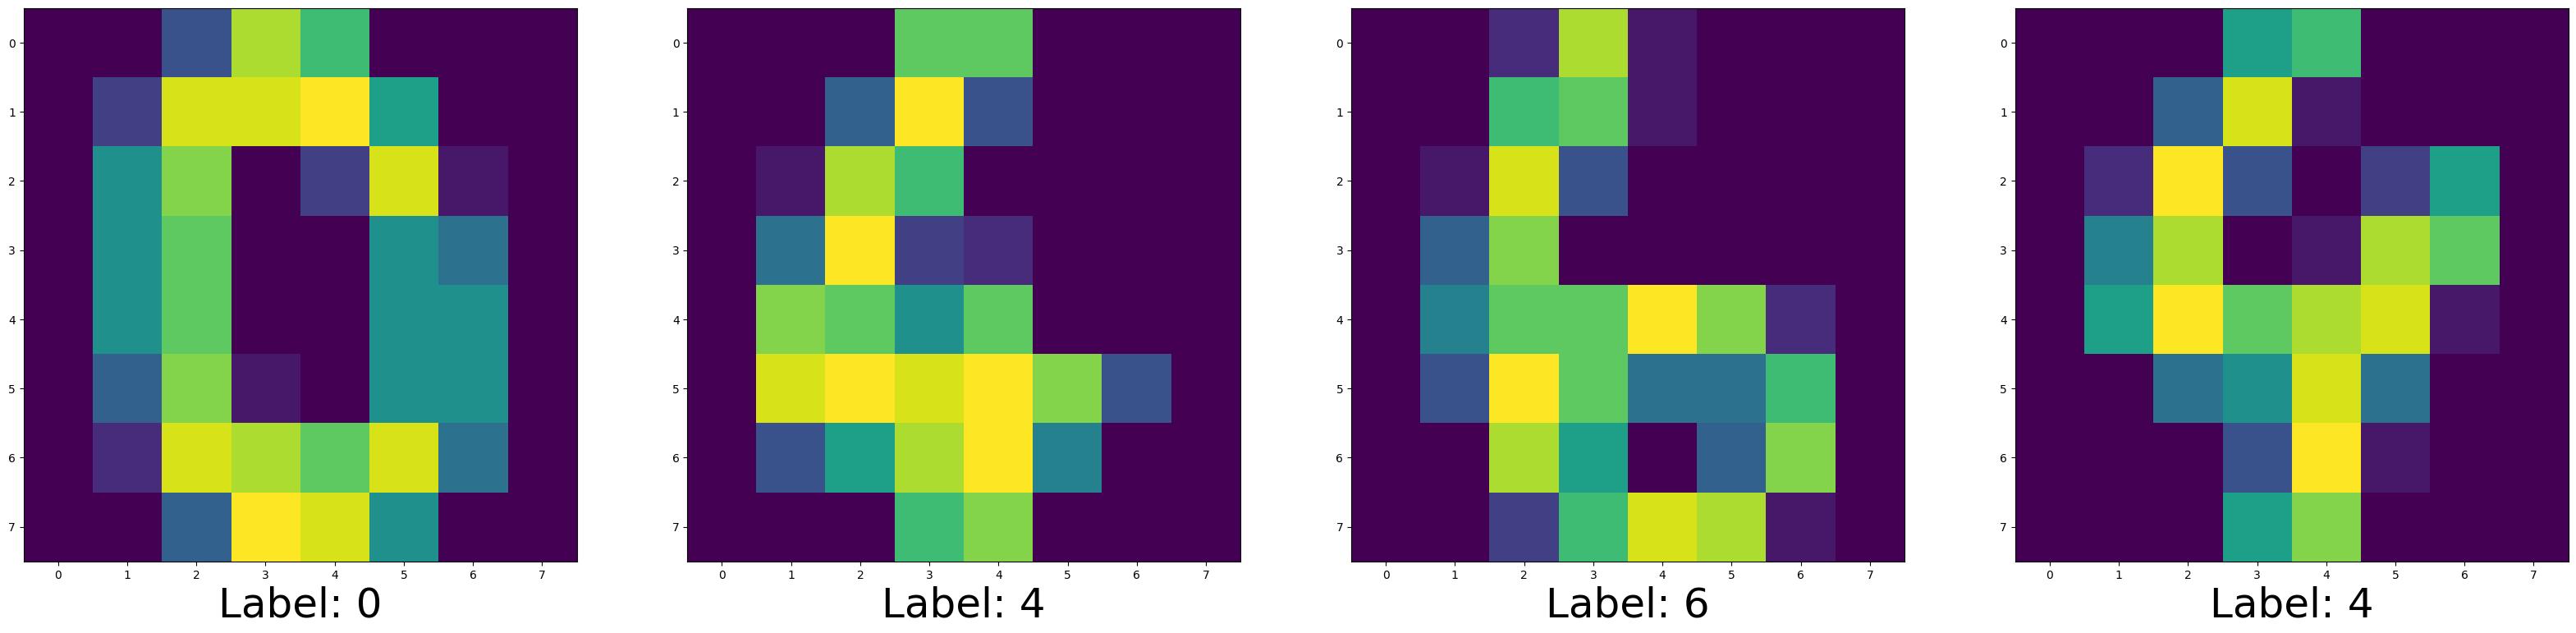

In [81]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [84]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    # 2. Split it based on the fraction
    # 3. Return (train_1, target_1, train_2, target_2of two splits
    
    # Shuffle the data and targets
    indices = np.random.permutation(len(data))
    data_shuffled = data[indices]
    target_shuffled = target[indices]

    # Calculate the split index based on the fraction
    split_index = int(len(data) * fraction)

    # Split the data and targets
    data_train, data_test = data_shuffled[:split_index], data_shuffled[split_index:]
    target_train, target_test = target_shuffled[:split_index], target_shuffled[split_index:]

    #######################################
    return data_train, target_train, data_test, target_test

In [85]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [86]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        data, digits.target, 0.5
    )

# Now Split the TRAIN data into 80% train and 20% cross-validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        X_trainval, y_trainval, 0.8
    )

In [87]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [88]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.00001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
########################################

Model output has shape (180, 10)


In [89]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    accuracy = (predictions == targets).mean() * 100
    return accuracy
    ########################################

In [90]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 61.111


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set.


Please write down your tested values and results here. Which gamma value worked best on the val set?


Gamma   -    Accuracy

0.1        - 10.000

0.01       - 52.778

0.001      - 98.333

0.0001     - 93.889

0.00001    - 66.667

In [91]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
########################################

In [92]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 98.443


In [93]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    #print(x)
    ########  TODO ########################
    # return per-sample softmax scores
    exp_x = np.exp(x)
    softmax_scores = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return softmax_scores
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class
pred = softmax(output)
scores = np.argmax(pred, axis=1)
print(output.shape)
print(scores.shape)
########################################

(899, 10)
(899,)


Visualize some of the test predictions!

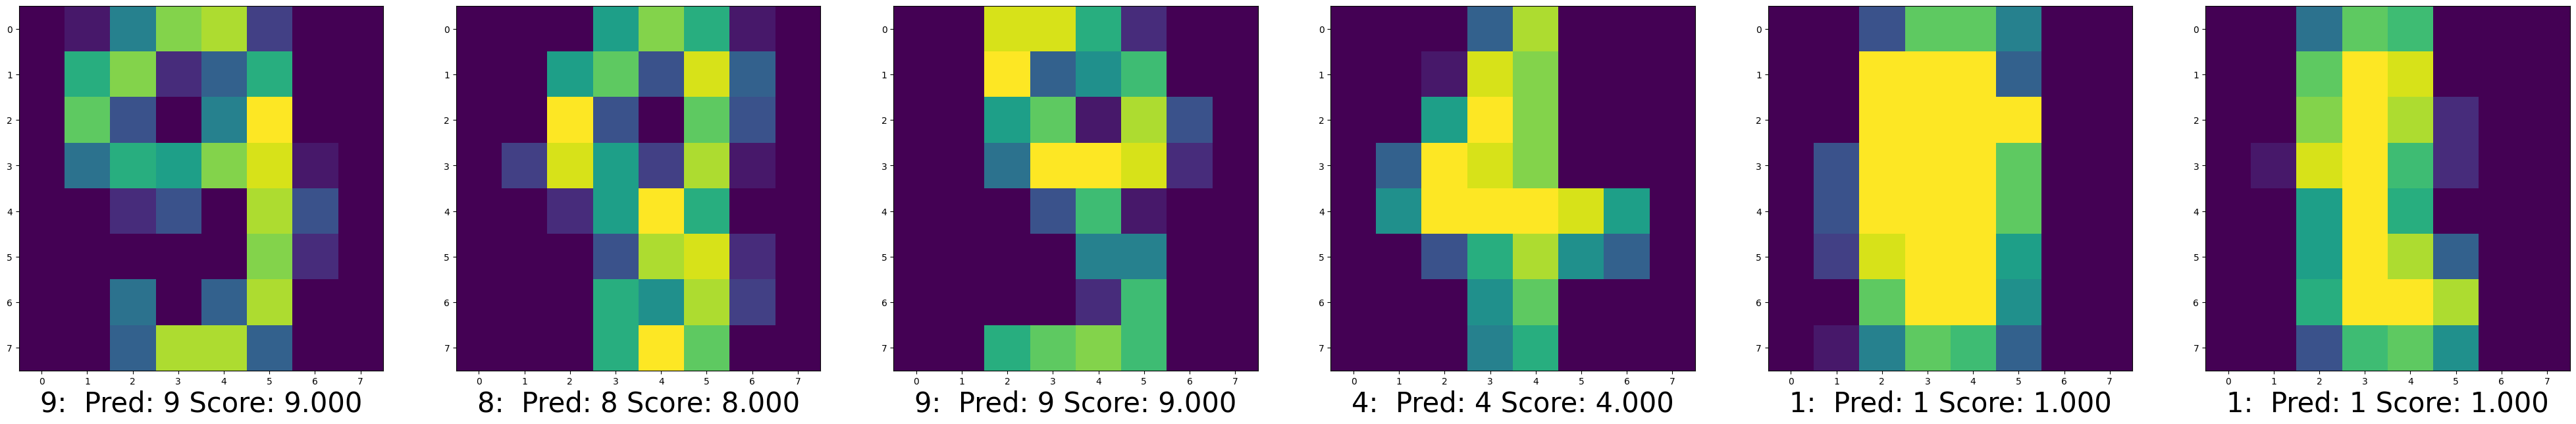

In [94]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    ) 

plt.show()